In [1]:
import meld_graph
import meld_graph.models
import meld_graph.experiment
import meld_graph.dataset
import meld_graph.data_preprocessing
import meld_graph.evaluation


import importlib
importlib.reload(meld_graph)
importlib.reload(meld_graph.models)
importlib.reload(meld_graph.dataset)
importlib.reload(meld_graph.experiment)
importlib.reload(meld_graph.data_preprocessing)
importlib.reload(meld_graph.evaluation)

import logging
import os
import json

from meld_graph.dataset import GraphDataset, Oversampler
from meld_classifier.meld_cohort import MeldCohort, MeldSubject
from meld_graph.training import Metrics
import numpy as np
from meld_graph.paths import EXPERIMENT_PATH

from meld_graph.evaluation import Evaluator



Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to 
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1


### testing the class

In [2]:
#initialise dataset

cohort= MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5', dataset='MELD_dataset_V6.csv')

# initialise subjects manually in list or get from a csv dataset
subject_ids, trainval_ids, test_ids  = cohort.read_subject_ids_from_dataset()

subjects = ['MELD_H4_15T_FCD_0002',
# 'MELD_H4_15T_FCD_0002','MELD_H4_15T_C_0004','MELD_H4_15T_C_0005'
]

features= [
          '.combat.on_lh.pial.K_filtered.sm20.mgh',
          '.combat.on_lh.thickness.sm10.mgh',
          '.combat.on_lh.w-g.pct.sm10.mgh',
          '.combat.on_lh.sulc.sm5.mgh',
          '.combat.on_lh.curv.sm5.mgh',
          '.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
          '.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
          '.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
          '.combat.on_lh.gm_FLAIR_0.sm10.mgh',
          '.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
          '.combat.on_lh.wm_FLAIR_1.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
          '.inter_z.intra_z.combat.on_lh.thickness.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.sulc.sm5.mgh',
          '.inter_z.intra_z.combat.on_lh.curv.sm5.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.thickness.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.sulc.sm5.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.curv.sm5.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh',]

# initiate params
params = {                
          "features":features,
          "augment_data": {}, 
          "lesion_bias":0,
          "lobes": False,
          "synthetic_data": {
              'run_synthetic': False,
              # 'n_subs': 200,
              # 'use_controls': True,
              # 'radius': 0.5,
              # 'n_subtypes': 25,
              # 'jitter_factor': 2,
              # 'bias': 1,
              # 'proportion_features_abnormal': 0.2,
              # 'proportion_hemispheres_lesional': 0.9,
            },
          "number_of_folds": 10,
          "preprocessing_parameters": {
              "scaling": None, 
              "zscore": '../data/feature_means.json',
            },
          "combine_hemis": None,
          }

#load dataset
dataset = GraphDataset(subjects, cohort, params, mode='test')


dataset using distance_maps


### Load model and predict

In [3]:
importlib.reload(meld_graph.evaluation)
from meld_graph.evaluation import Evaluator

In [8]:
# initialise models you want to run
EXPERIMENT_PATH='/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1'

model_name = 'random1'
model_path =  '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/22-10-24_synth/3layers/finetune_real/fold_00/'

In [19]:
# initialise models you want to run
EXPERIMENT_PATH='/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1'

model_name = 'random3'
model_path =  '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/22-12-13_finetune/dcd/fold_00/'

In [20]:
from pyexpat import model

    
#load experiment already trained using checkpoint path
model_base_path=model_path
checkpoint_path=os.path.join(EXPERIMENT_PATH, model_base_path)
exp = meld_graph.experiment.Experiment.from_folder(checkpoint_path)

# Run the evaluation on the test data and save into directory provided
save_dir=os.path.join(EXPERIMENT_PATH,f'22-12-12_real_evaluation_test_distance/{model_name}')

eva = Evaluator(experiment = exp,
                checkpoint_path = checkpoint_path,
                save_dir = save_dir ,
                make_images = True,
                dataset=dataset,
                cohort=cohort,
            )

# evaluate (predict , stats and plot) or just run individually each step
# eva.evaluate()

# # load data and predict
eva.load_predict_data()
# # calculate stats 
eva.stat_subjects()
#  # make images 
eva.plot_subjects_prediction()

    

Initialised Experiment 22-12-13_finetune/dcd
Creating model
Loading model weights from checkpoint /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/22-12-13_finetune/dcd/fold_00/best_model.pt
loading data and predicting model
saving prediction for MELD_H4_15T_FCD_0002
saving distance_map for MELD_H4_15T_FCD_0002
/rds/user/co-ripa1/hpc-work/scripts/meld_classifier_GDL/meld_graph/evaluation.py:337: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig(filename, bbox_inches='tight')


### Look at results

In [25]:
# load results 
import pandas as pd

df={}
predicted={}

    
results_file = os.path.join(EXPERIMENT_PATH,f'22-12-12_real_evaluation_test_distance/{model_name}', 'results', 'test_results.csv')
df = pd.read_csv(results_file) 
    
    

In [26]:
df



,ID,group,detected,tp,fp,fn,tn,dice lesional,dice non-lesional
0,MELD_H4_15T_FCD_0002,True,True,675,421,6193,286515,0.169513,0.98859


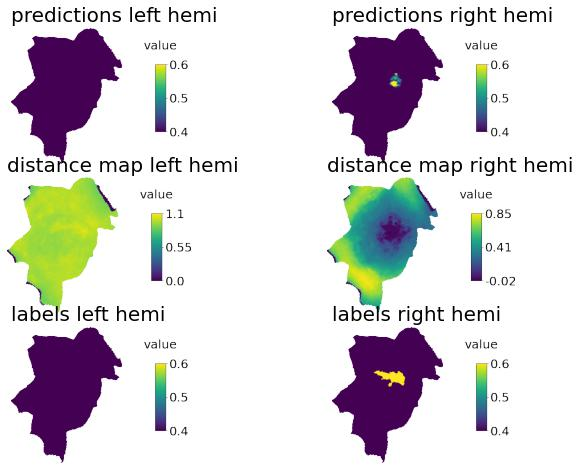

In [24]:
from IPython.display import Image
image_file = os.path.join(EXPERIMENT_PATH,f'22-12-12_real_evaluation_test_distance/{model_name}', 'results','images', 'MELD_H4_15T_FCD_0002.jpg')
Image(filename=image_file) 

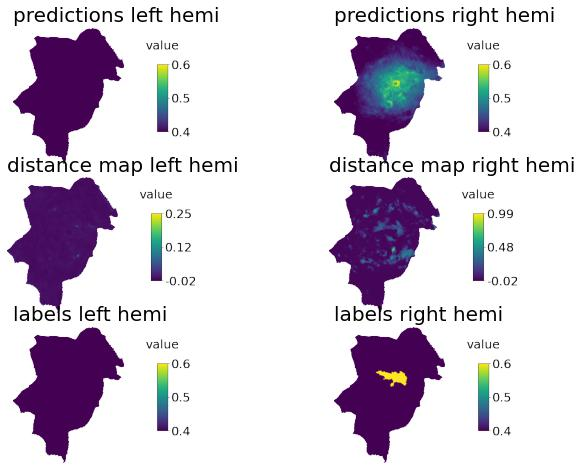

## Evaluation using baseline model

In [ ]:
# 
import torch
exp.load_model(checkpoint_path='/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-07-29_synth_3layer/finetune_radius0.2/fold_00/best_model.pt', 
               force=True )

In [ ]:
data_loader = torch_geometric.loader.DataLoader(dataset,
            shuffle=False, )

In [ ]:
#predict 
import torch_geometric.data
from meld_graph.training import Metrics

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
data_loader = torch_geometric.loader.DataLoader(dataset,
            shuffle=False, batch_size=2)
metrics = Metrics(params['metrics'])  # for keeping track of running metrics
for data in data_loader:
    print('loader')
    data = data.to(device)
    estimates = exp.model(data.x)
    labels = data.y.squeeze()   
    # metrics
    pred = torch.argmax(estimates[0], axis=1)
    # update running metrics
    metrics.update(pred, labels)

metrics.get_aggregated_metrics()

In [ ]:
#plot lesion
import matplotlib_surface_plotting as msp
from meld_graph.icospheres import IcoSpheres

#initialise the icosphere
icos=IcoSpheres(conv_type='SpiralConv')
ico_index=7
ico_ini = icos.icospheres[ico_index]

#plot example of feature on icosphere for 1 subject
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              pred.numpy()[0:163842], 
              parcel=labels.numpy()[0:163842], 
              parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[50,250], 
                 )


In [ ]:
#plot lesion
import matplotlib_surface_plotting as msp
from meld_graph.icospheres import IcoSpheres

#initialise the icosphere
icos=IcoSpheres(conv_type='SpiralConv')
ico_index=7
ico_ini = icos.icospheres[ico_index]

#plot example of feature on icosphere for 1 subject
index = 3
feat=1
features_subj, labels_subj = dataset.data_list[index]
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              features_subj[:,feat], 
              parcel=labels_subj, 
              parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[150,250], 
                 )
